# Machine Learning Mini Project (Recommendation Systems)
---

## Phase 1:- Introduction and Data Analysis
---

#### Objectives:-
- create a recommendation system using the **movielens** dataset
- use collaborative filtering and content based recommendation to suggest movies to users and execute the same using KNN and cosine similarity
- build an app with a simple UI and build an API for the model
---

#### MetaData:-
- This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

- Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

- The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. More details about the contents and use of all these files follows.

- This is a *development* dataset. As such, it may change over time and is not an appropriate dataset for shared research results. See available *benchmark* datasets if that is your intent.

- This and other GroupLens data sets are publicly available for download at <http://grouplens.org/datasets/>.
---

#### App:-
- the application will have user login and sign up page through which the users can access the home page
- the home page will have a search bar to search for movies
---

#### Tech Stack:- 
- Python: scikit-learn, pandas, matplotlib, streamlit, SQLite3
- API: FastAPI

In [51]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# importing the dataset
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
ratings = pd.read_csv('ratings.csv')

In [53]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [54]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [55]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### Checking for NaN values

In [56]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [57]:
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [58]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

#### No NaN values
---

## EDA:-

[Text(0.5, 1.0, 'Number of Movies by genre')]

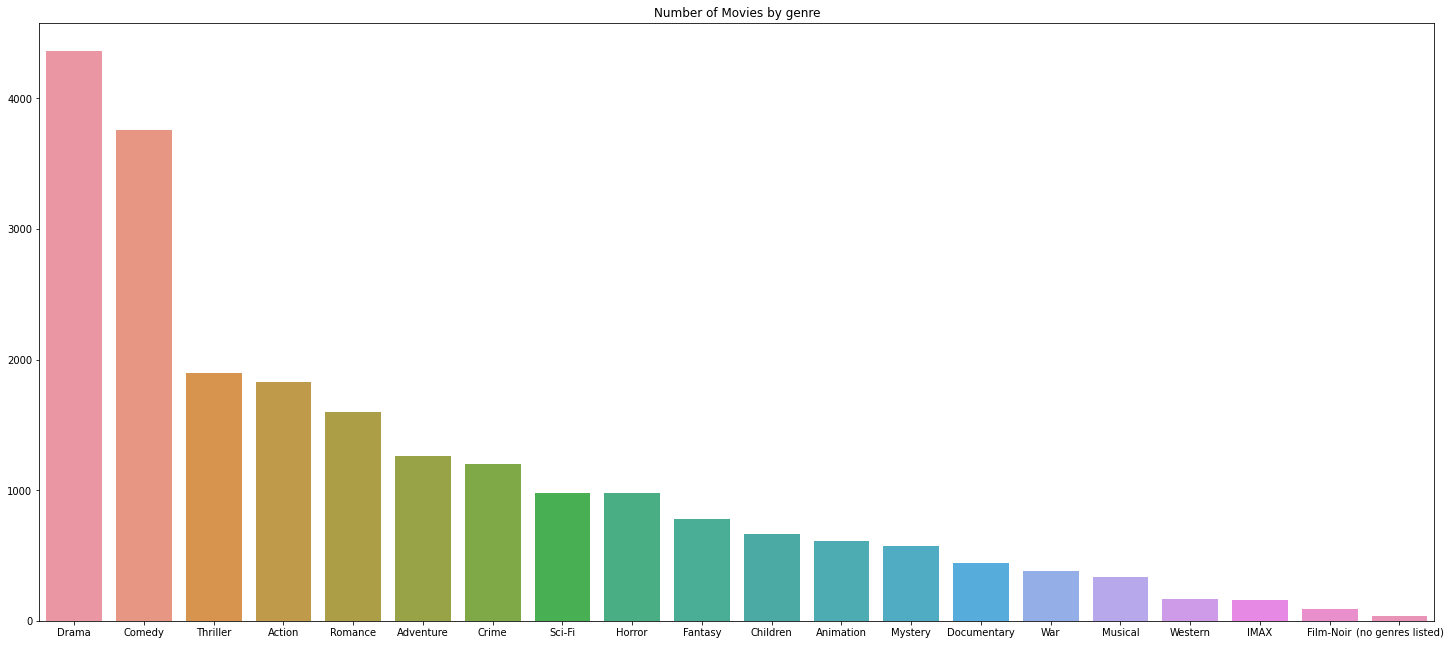

In [59]:
genres = pd.DataFrame(movies.genres.str.split('|').tolist())
genre_count = genres.stack().value_counts()
plt.figure(figsize=(25,11))
sns.barplot(x=genre_count.index, y=genre_count.values).set(title='Number of Movies by genre')

#### More than 4000 movies are of the genre 'Drama'
---

In [60]:
# merging 'ratings' and 'movies'
ratings_movies_df = pd.merge(left=movies, right=ratings, on='movieId')
ratings_movies_df = pd.concat([ratings_movies_df.drop('genres', axis=1), ratings_movies_df.genres.str.get_dummies(sep='|')], axis=1)
genre_list = genres.stack().unique().tolist()
avg_ratings = []
for genre in genre_list:
    avg_rating = ratings_movies_df.groupby(genre)['rating'].mean()[0]
    avg_ratings.append(avg_rating)

[Text(0.5, 1.0, 'Average rating by genre')]

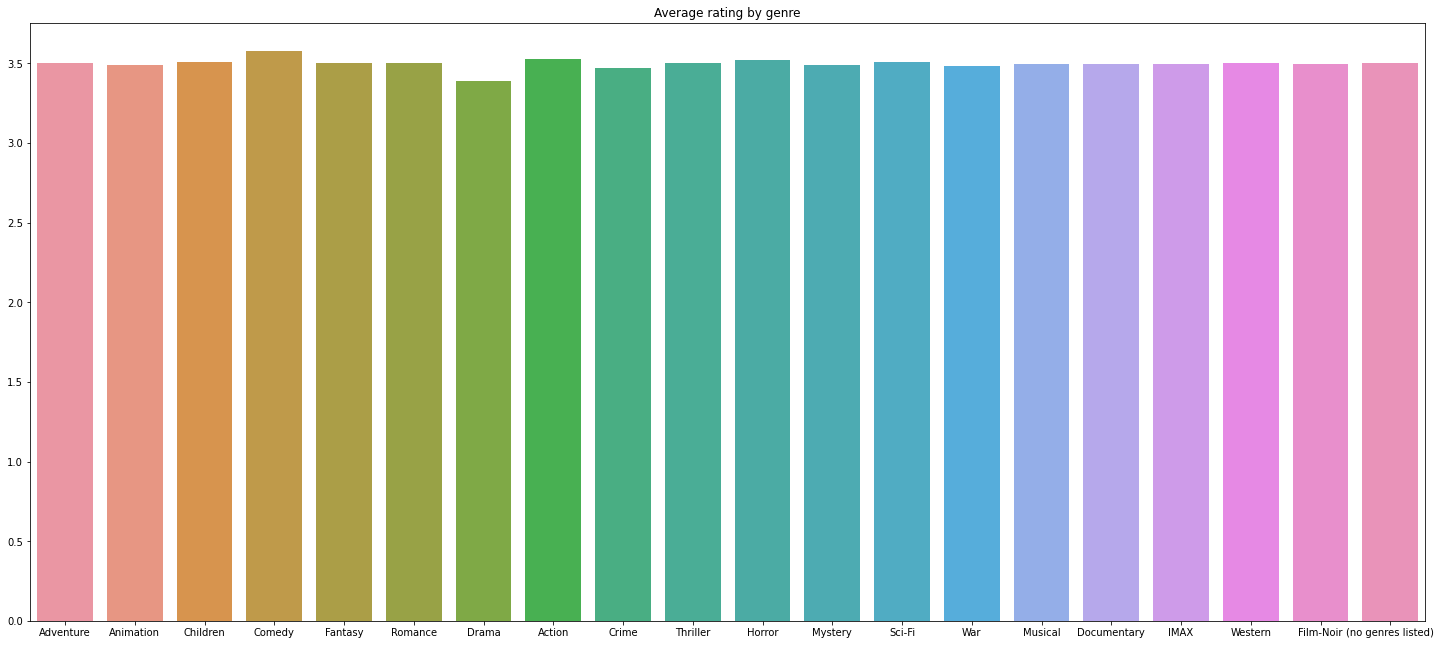

In [61]:
plt.figure(figsize=(25,11))
sns.barplot(x=genre_list, y=avg_ratings).set(title='Average rating by genre')

#### All the genres have a similar average rating
---

[Text(0.5, 1.0, 'Correlation between genres')]

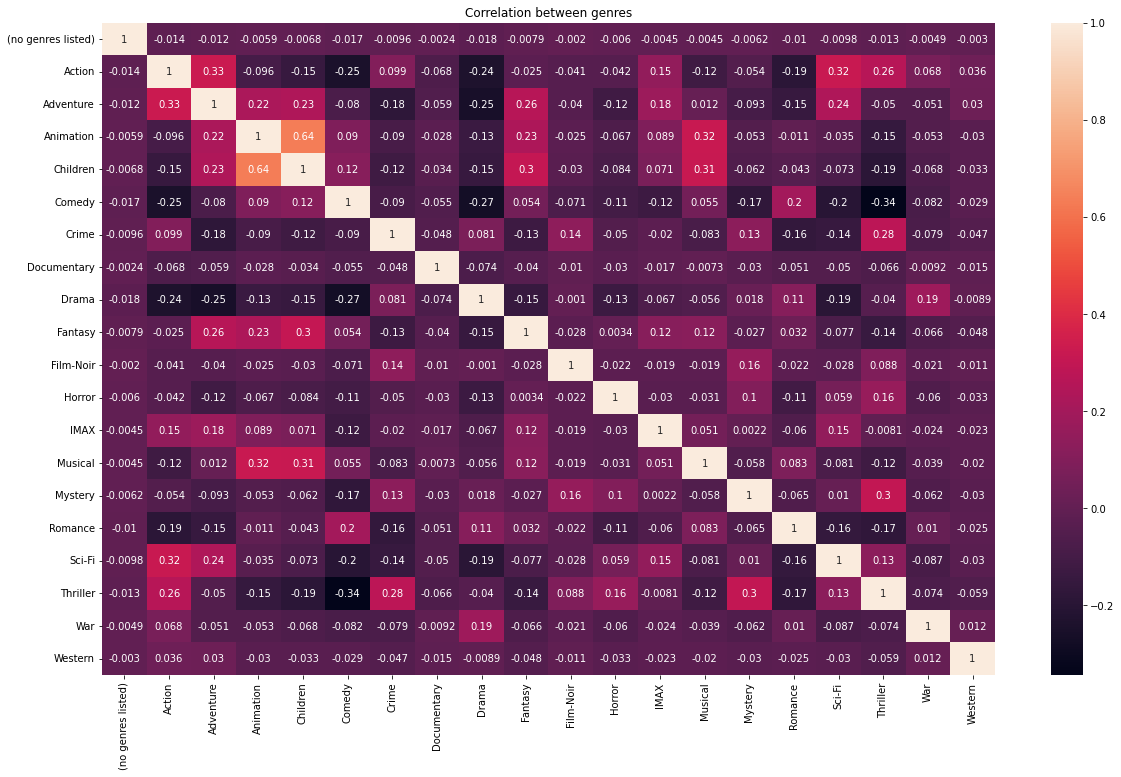

In [62]:
cory = ratings_movies_df[ratings_movies_df.columns[5:]].corr()
plt.figure(figsize=(20,12))
sns.heatmap(cory, annot=True).set(title='Correlation between genres')

##### We can see higher correlation between some genres like
- Animation and Children
- Adventure and Action
- Mystery and Thriller
---

#### Number of ratings for each user with movieId:-

In [63]:
x = ratings.groupby('userId').movieId.count()
y = ratings.groupby('userId').rating.mean()
rating_with_userid = pd.merge(left=x, right=y, on='userId')
rating_with_userid.sort_values('movieId', ascending=False)
# we can clearly see here which user has rated the most number of movies

,movieId,rating
userId,,
414,2698,3.391957
599,2478,2.642050
474,2108,3.398956
448,1864,2.847371
274,1346,3.235884
...,...,...
442,20,1.275000
569,20,4.000000
320,20,3.525000


##### User 414 has rated movies the highest number of times with an average rating of 3.391

---
#### Ratings with respect to movie title:-

In [64]:
X = ratings_movies_df.groupby('title').rating.count()
Y = ratings_movies_df.groupby('title').rating.mean()
rating_title = pd.DataFrame(data=X)
rating_title['ratingAvg'] = pd.DataFrame(Y)
rating_title.sort_values('rating', ascending=False)

,rating,ratingAvg
title,,
Forrest Gump (1994),329,4.164134
"Shawshank Redemption, The (1994)",317,4.429022
Pulp Fiction (1994),307,4.197068
"Silence of the Lambs, The (1991)",279,4.161290
"Matrix, The (1999)",278,4.192446
...,...,...
King Solomon's Mines (1950),1,3.000000
King Solomon's Mines (1937),1,2.500000
King Ralph (1991),1,1.500000


##### Here we can see that 'Forest Gump' has recieved the most number of ratings and 'À nous la liberté (Freedom for Us)' haas recieved the least number of ratings

In [65]:
rating_title.sort_values('ratingAvg', ascending=True)

,rating,ratingAvg
title,,
Rust and Bone (De rouille et d'os) (2012),1,0.5
The Emoji Movie (2017),1,0.5
The Butterfly Effect 3: Revelations (2009),1,0.5
"Follow Me, Boys! (1966)",1,0.5
The Beast of Hollow Mountain (1956),1,0.5
...,...,...
Winnie the Pooh and the Day of Concern (1972),1,5.0
Sorority House Massacre II (1990),1,5.0
My Love (2006),1,5.0


##### The movies with the least average and highest average only have one review so we should filter out the movies with lower number of reviews

In [66]:
filtering_df = rating_title[rating_title['rating']>50]
filtering_df.sort_values('ratingAvg', ascending=False)

,rating,ratingAvg
title,,
"Shawshank Redemption, The (1994)",317,4.429022
"Godfather, The (1972)",192,4.289062
Fight Club (1999),218,4.272936
Cool Hand Luke (1967),57,4.271930
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),97,4.268041
...,...,...
Johnny Mnemonic (1995),53,2.679245
Judge Dredd (1995),62,2.669355
City Slickers II: The Legend of Curly's Gold (1994),55,2.645455


##### The movie with the highest average rating is Shawshank Redemption
---

In [67]:
# merging ratings and tags
rating_tag = pd.merge(left=ratings, right=tags, on='movieId')
rating_tag.drop(['userId_x', 'userId_y', 'timestamp_x', 'timestamp_y'], axis=1, inplace=True)

##### Tags with respect to average rating:- 

In [68]:
x_new = rating_tag.groupby('tag')['rating'].count()
y_new = rating_tag.groupby('tag')['rating'].mean()
tag_avgRating = pd.DataFrame(data=x_new)
tag_avgRating['avg_rating'] = pd.DataFrame(y_new)
tag_avgRating.sort_values('rating', ascending=False)

,rating,avg_rating
tag,,
sci-fi,2527,4.045706
thought-provoking,2487,4.100925
twist ending,2434,4.085045
atmospheric,2227,4.006960
dark comedy,2056,4.061041
...,...,...
mirrors,1,3.500000
missing children,1,4.000000
Van Gogh,1,2.500000


##### 'sci-fi' is the tag with the highest number of rating followed by 'thought-provoking' and 'twist ending'

In [69]:
# filtering out the training examples with number of ratings less than 50
tag_avgRating_temp = tag_avgRating[tag_avgRating['rating']>50]
tag_avgRating_temp.sort_values('avg_rating', ascending=False)

,rating,avg_rating
tag,,
wrongful imprisonment,317,4.429022
prison,388,4.393041
Morgan Freeman,393,4.344784
psychological thriller,218,4.272936
imaginary friend,218,4.272936
...,...,...
heroine in tight suit,53,2.726415
Bugs Bunny,53,2.707547
Jessica Alba,56,2.696429


##### 'wrongful imprisonment' has the highest average rating followed by 'prison' and 'Morgan Freeman'